NearestNeighbors(n_neighbors=11)


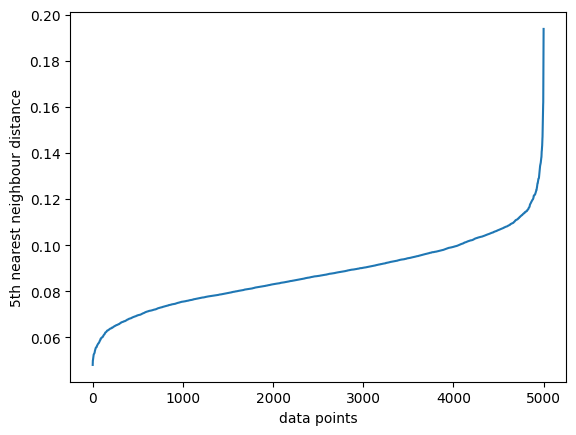

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
df=pd.read_csv("vizag_5000.csv")
df.isnull()
coords=df[["lat","long"]].to_numpy()
scaler=StandardScaler()
coordinates=scaler.fit_transform(coords)
cluster=DBSCAN(eps=0.07,min_samples=5)
neighbours=NearestNeighbors(n_neighbors=11)
neighbours.fit(coordinates)
print(neighbours)
dist,idx=neighbours.kneighbors(coordinates)
dist=np.sort(dist[:,10])
plt.plot(dist)
plt.xlabel("data points")
plt.ylabel("5th nearest neighbour distance")
plt.show()

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33]



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


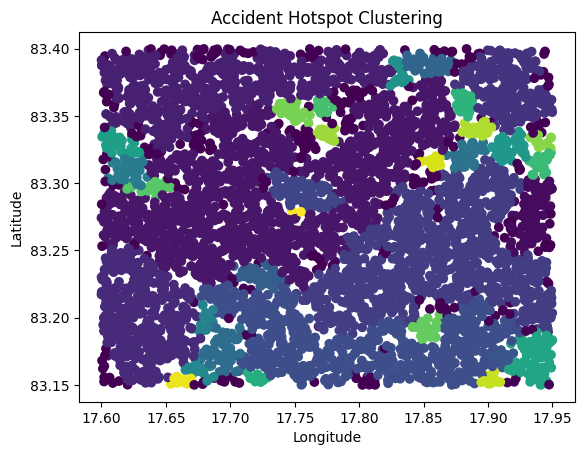

    cluster        lat       long
0         0  17.933934  83.277511
1         1  17.735366  83.295468
2         2  17.694993  83.373394
3         3  17.632985  83.199732
4         4  17.914947  83.371940
5         5  17.858163  83.244175
6         6  17.755709  83.293472
7         7  17.800073  83.180989
8         8  17.910003  83.170184
9         9  17.723675  83.231216
10       10  17.852958  83.388532
11       11  17.693888  83.175898
12       12  17.883751  83.321065
13       13  17.621625  83.309218
14       14  17.680879  83.198236
15       15  17.675558  83.160282
16       16  17.830874  83.380969
17       17  17.917033  83.326052
18       18  17.614191  83.329072
19       19  17.935505  83.169578
20       20  17.721361  83.155210
21       21  17.881047  83.358767
22       22  17.940868  83.315133
23       23  17.771553  83.356760
24       24  17.639139  83.296361
25       25  17.853157  83.191515
26       26  17.748833  83.353052
27       27  17.941814  83.330122
28       28  1

In [32]:
!pip install folium
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

#Read the Dataset
df=pd.read_csv("vizag_5000.csv")
#check for missing values
df.isnull() # o/p: No missing values so need to handle them

#consider only spatial data for clustering
coords=df[["lat","long"]].to_numpy()

#Normaization 
scaler=StandardScaler()
coordinates=scaler.fit_transform(coords)

#clustering
cluster=DBSCAN(eps=0.09,min_samples=11)  # increasing value form 0.10 giving dense clusters so reduced to 0.09
labels=cluster.fit_predict(coordinates)
print(np.unique(labels))

# add new column cluster in the df
df["cluster"]=labels

#visualization of clusters using scatter plot
plt.scatter(df["lat"],df["long"],c=df["cluster"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accident Hotspot Clustering")
plt.show()
#print(df["cluster"].value_counts())

#Visualization of clusters on City Map
clustered_df = df[df["cluster"] != -1]  #remove noise values and consider only clustered data



clustered_centers=(clustered_df.groupby("cluster")[["lat","long"]].mean().reset_index())
print(clustered_centers)

# identifying centered lat and long to open the map at the default city
center_lat=df["lat"].mean()
center_long=df["long"].mean()

#creating Blank Map
map=folium.Map(location=[center_lat,center_long],zoom_start=12)

#Creating Bubble Grouping system to view clusters as containers in map
market_cluster= MarkerCluster().add_to(map)

#Adding clusters to the Hotspot Markers

for _, row in clustered_centers.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]],
        popup=f"Hotspot {row['cluster']}",
        icon=folium.Icon(color="red")
    ).add_to(market_cluster)

map.save("Hotspots_map.html")
